## Exploring data with Python - visualize data
This notebook contains a few techniques to analyze data with basic statistics and visualize it using graphs.

In [1]:
import pandas as pd

In [2]:
# Load Data from text file
get_ipython().system('wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv')
df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')

--2023-08-31 05:22:33--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv’

grades.csv          100%[===================>]     322  --.-KB/s    in 0s      

2023-08-31 05:22:33 (21.7 MB/s) - ‘grades.csv’ saved [322/322]



In [3]:
# Remove any rows with Missing Data
df_students = df_students.dropna(axis=0, how='any')

In [4]:
# Calculating who passed, assuming the passing grade is 60
passes = pd.Series(df_students['Grade']>=60)

In [5]:
# Save who passed into pandas dataframe
df_students = pd.concat([df_students,passes.rename("Pass")],axis=1)
df_students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


## Visualizing data with Matplotlib
DataFrames provide a great way to explore and analyze tabular data, but sometimes a picture is worth a thousand rows and columns. The **Matplotlib** library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.

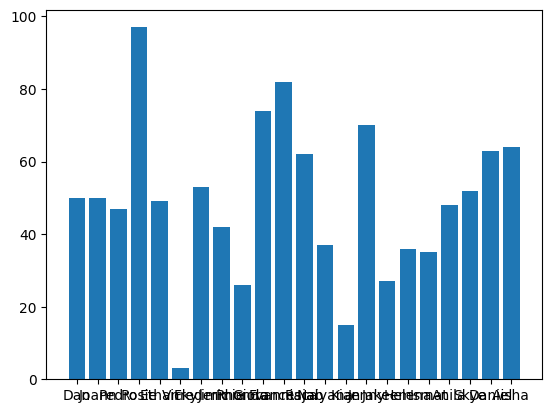

In [10]:
get_ipython().run_line_magic('matplotlib','inline')
from matplotlib import pyplot as plt

# Creating a Bar plot of name vs Grade
plt.bar(x=df_students.Name, height = df_students.Grade)
plt.show()

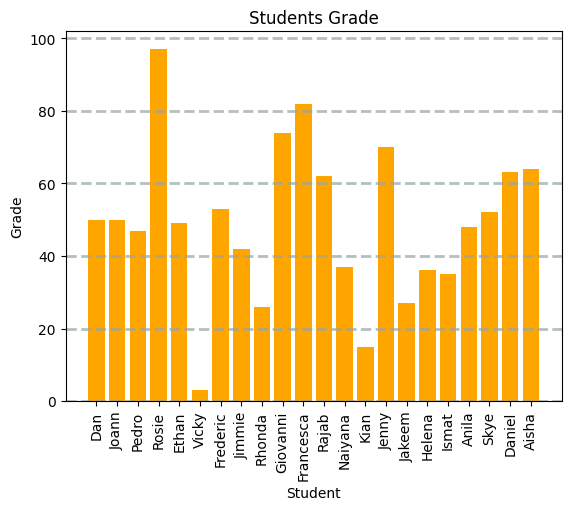

In [12]:
# Well, that worked, but the chart could use some improvements to make it clearer what we're looking at.

# Creare a bar plot of Name vs Grade
plt.bar(x=df_students.Name, height=df_students.Grade,color='orange')

# Customizing the chart
plt.title('Students Grade')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6',linestyle= '--', linewidth=2,axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

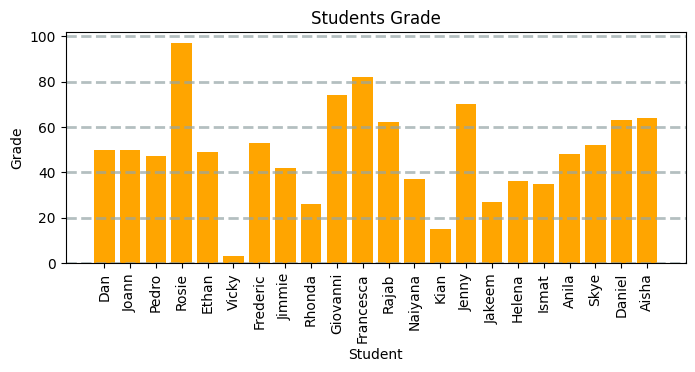

In [14]:
# Creating a Figure with a specific size

fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs Grade
plt.bar(x=df_students.Name, height=df_students.Grade,color='orange')

# Customizing the chart
plt.title('Students Grade')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6',linestyle= '--', linewidth=2,axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

<ipython-input-15-410257a525f9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)


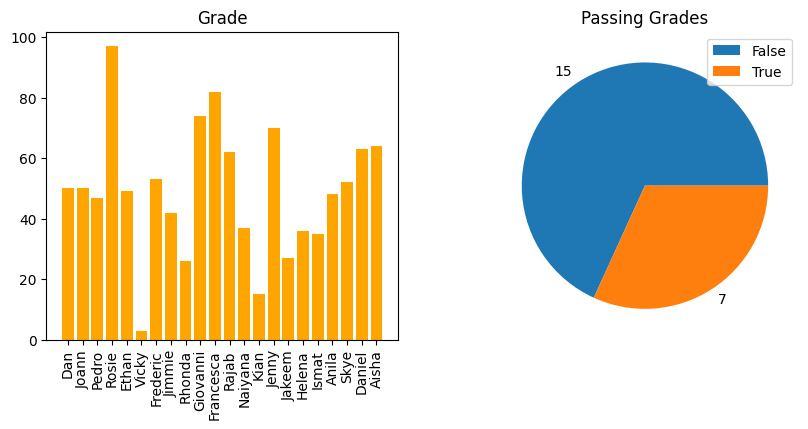

In [15]:
# A figure can contain multiple subplots, each on its own axis.

# Create a figure for 2 subplots (1 row, 2 column)
figsize, ax =plt.subplots(1,2, figsize=(10,4))

# Create a bar plot of name vs student in the first axis
ax[0].bar(x=df_students.Name, height= df_students.Grade, color='orange')
ax[0].set_title('Grade')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a Pie chart of pass counts on the other second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the figure
fig.suptitle('Student Data')

fig.show()

- Matplotlib is so foundational to graphics in Python that many packages, including Pandas, provide methods that abstract the underlying Matplotlib functions and simplify plotting. For example, the DataFrame provides its own methods for plotting data as shown in the following example, which plots a bar chart of study hours.

<Axes: xlabel='Name'>

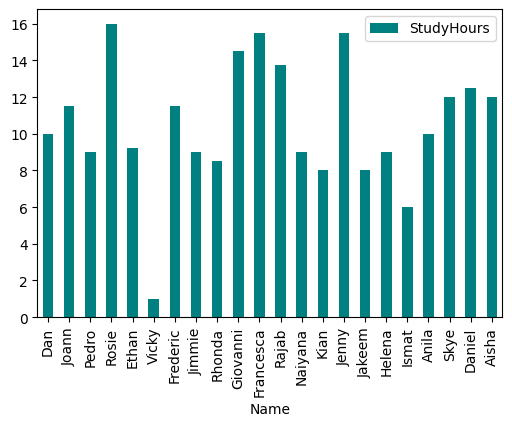

In [16]:
df_students.plot.bar(x='Name',y='StudyHours', color='teal', figsize=(6,4))

# Getting started with statistical analysis

## Descriptive Statistics and Data Distribution

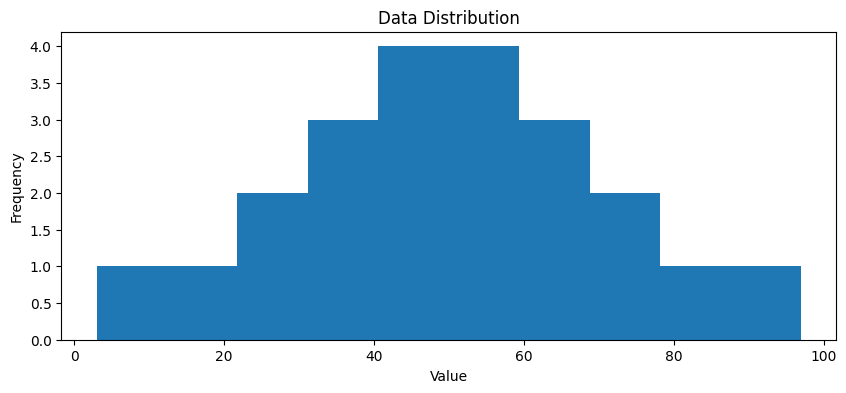

In [17]:
# A lot of data science is rooted in statistics
var_data = df_students['Grade']

# Create a figure
fig = plt.figure(figsize=(10,4))

# Histogram
plt.hist(var_data)

# Titles and Labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()

The histogram for grades is a symmetric shape, where the most frequently occurring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.

# Measures of Central Tendency

- The goal of this analysis is to try to find a "typical" value. Common ways to define the middle of the data include:
- The *mean*: A simple average based on adding together all of the values in the sample set and then dividing the total by the number of samples.
- The *median*: The value in the middle of the range of all of the sample values.
- The *mode*: The most commonly occurring value in the sample set<sup>\*</sup>.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



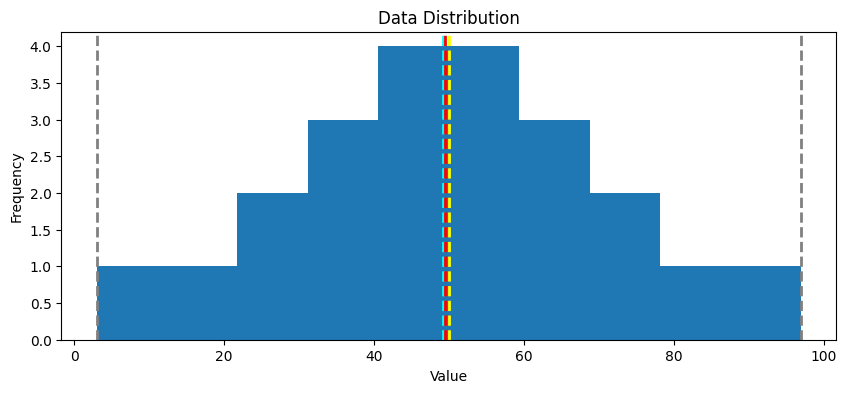

In [19]:
var = df_students['Grade']

# Get stats
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a figure
fig = plt.figure(figsize=(10,4))

# Create a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

### Another way to visualize the distribution of a variable is to use a *box* plot (sometimes called a *box-and-whiskers* plot).

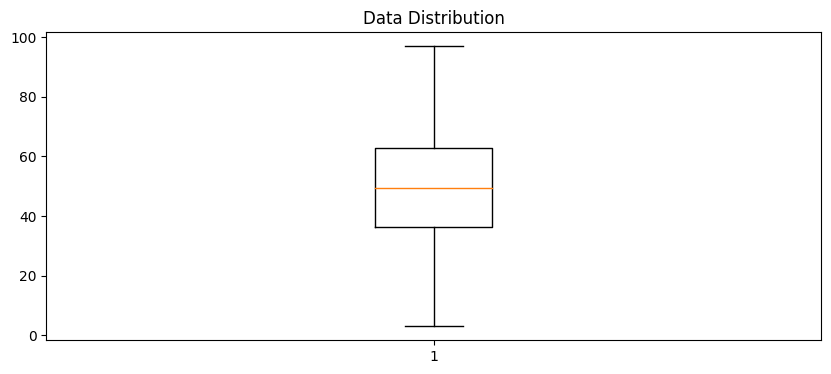

In [20]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

The box plot shows the distribution of the grade values in a format different from the histogram.
The *box* part of the plot shows where the inner two *quartiles* of the data reside.
In this case, half of the grades are between approximately 36 and 63. The *whiskers* extending from the box show the outer two quartiles, so the other half of the grades in this case are between 0 and 36 or 63 and 100. The line in the box indicates the *median* value.

In [21]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



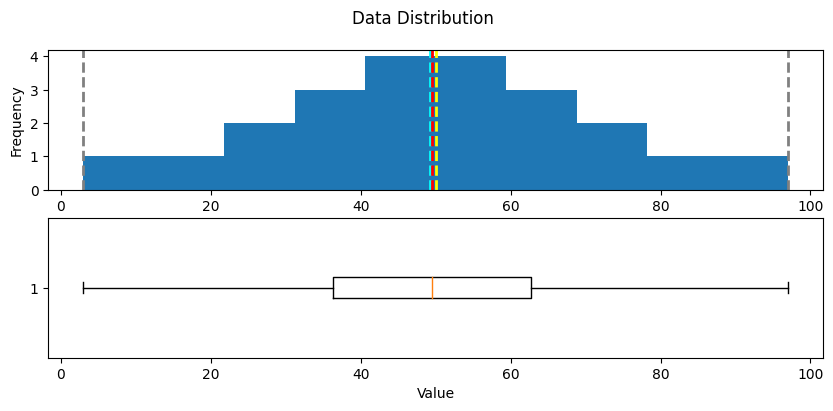

In [22]:
# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

* All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

* statistics is fundamentally about taking *samples* of data and using probability functions to extrapolate information about the full *population* of data.

* *Samples* refer to the data we have on hand, such as information about these 22 students' study habits and grades. The *population* refers to all possible data we could collect, such as every student's grades and study habits across every educational institution throughout the history of time. Usually we're interested in the population, but it's simply not practical to collect all of that data. Instead, we need to try estimate what the population is like from the small amount of data (samples) that we have.

* If we have enough samples, we can calculate something called a *probability density function*, which estimates the distribution of grades for the full population.

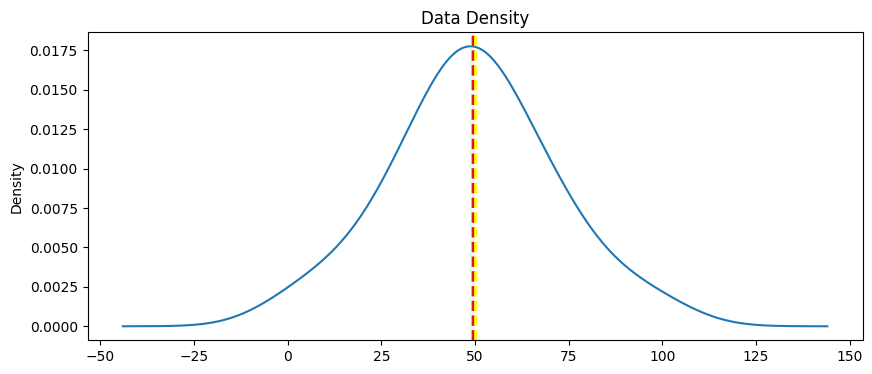

In [23]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

As expected from the histogram of the sample, the density shows the characteristic "bell curve" of what statisticians call a *normal* distribution with the mean and mode at the center and symmetric tails.